In [1]:
from Datapipeline import Datapipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [2]:
models = [DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42), LogisticRegression(random_state=42, max_iter=3000), XGBClassifier(random_state=42)]

In [3]:
df = pd.read_csv('../train.csv')
labels = df['Churn']
df = df.drop('Churn', axis='columns')

In [4]:
pl = Datapipeline()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [5]:
scores_acc = []
scores_pre = []
scores_recall = []
scores_f1 = []

for model in models:
    pl = Datapipeline()
    pl.steps.append(['classifier', model])
    acc_score = cross_val_score(pl, df, labels, scoring='accuracy', cv=skf)
    scores_acc.append(acc_score)

    pre_score = cross_val_score(pl, df, labels, scoring='precision', cv=skf)
    scores_pre.append(pre_score)

    recall_score = cross_val_score(pl, df, labels, scoring='recall', cv=skf)
    scores_recall.append(recall_score)

    f1_score = cross_val_score(pl, df, labels, scoring='f1', cv=skf)
    scores_f1.append(f1_score)

In [6]:
model_names = ['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression', 'XGBClassifier']

In [7]:
def box_plot_score(score, score_name, model_names = model_names):
    plt.figure(figsize=(8, 4))
    plt.boxplot(score)
    plt.xlabel('Model', fontsize=5)
    plt.ylabel('Score', fontsize=5)
    plt.xticks(np.arange(len(model_names))+1, model_names, rotation=45, fontsize=8)
    plt.title(score_name, fontsize=5)

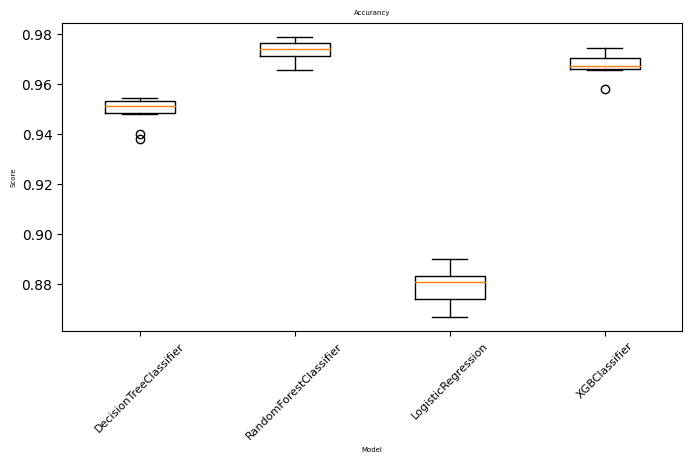

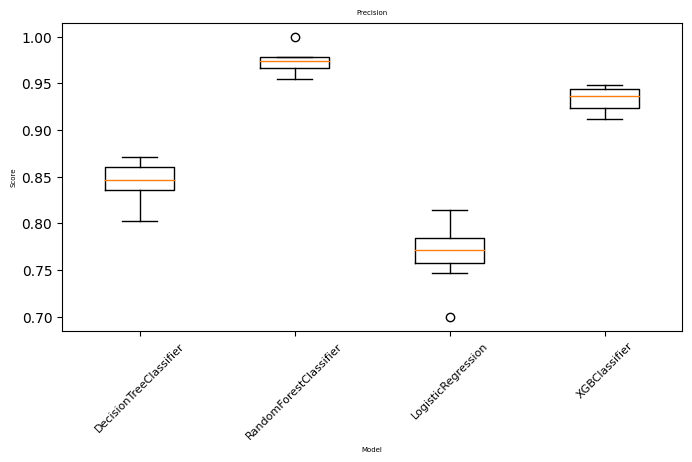

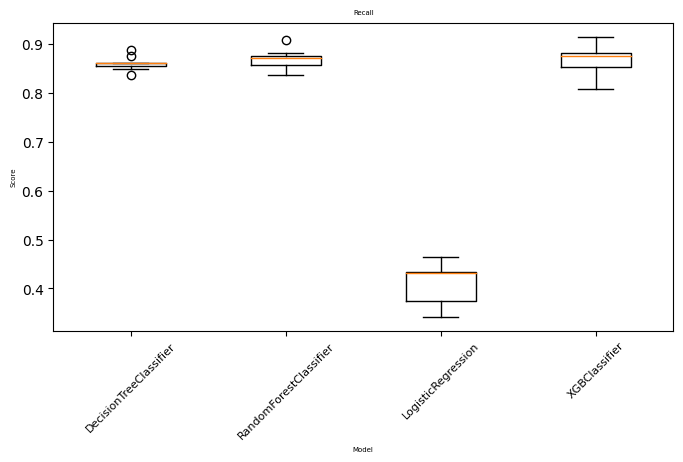

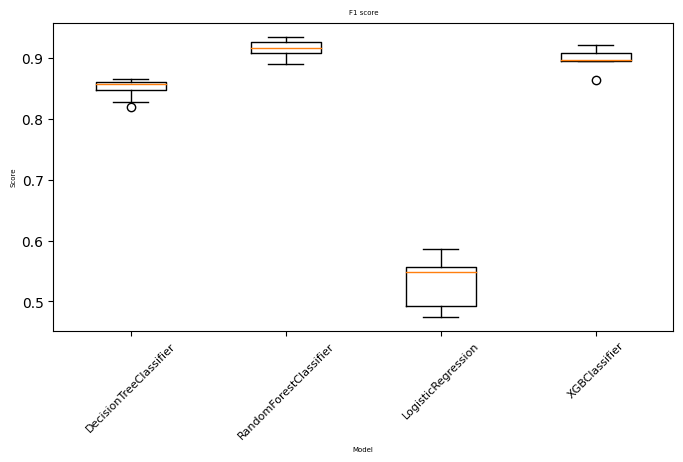

In [8]:
box_plot_score(scores_acc, "Accurancy")
box_plot_score(scores_pre, "Precision")
box_plot_score(scores_recall, "Recall")
box_plot_score(scores_f1, "F1 score")

In [9]:
for i in range(len(model_names)):
    print(model_names[i])
    print("\tAcc: {:.2f}\tPre: {:.2f}\tRecall: {:.2f}\tF1: {:.2f}".format(np.mean(scores_acc[i]), np.mean(scores_pre[i]), np.mean(scores_recall[i]), np.mean(scores_f1[i])))
    

DecisionTreeClassifier
	Acc: 0.95	Pre: 0.84	Recall: 0.86	F1: 0.85
RandomForestClassifier
	Acc: 0.97	Pre: 0.97	Recall: 0.87	F1: 0.92
LogisticRegression
	Acc: 0.88	Pre: 0.77	Recall: 0.41	F1: 0.53
XGBClassifier
	Acc: 0.97	Pre: 0.93	Recall: 0.87	F1: 0.90
